In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import datetime
import pandas as pd
from pyHeatBJ import Column

In [ ]:
#### Simulation 1 : K=1e-4 m/s

In [24]:
test = pd.read_csv('value to test.csv')
test.drop(columns=['Unnamed: 0'])
test_val = test.values.tolist()
test_val=np.asarray(test_val)
test_val=test_val[:,1:]

dH_test = [[datetime.datetime.today()+ datetime.timedelta(seconds=i*1.5*3600),[0.125e-2,test_val[i][0]]] for i in range(len(test_val))][:120]

T_test = [[datetime.datetime.today()+ datetime.timedelta(seconds=i*1.5*3600),list(test_val[i,1:])] for i in range(len(test_val))][:120]

col_dict = {
    "river_bed": 1, ##hauteur de la rivière en m
    "offset" : 0.05,#décalage
    "depth_sensors": np.array([.2, .4, .6, .8]), # Profondeur ou sont les capteurs
    "dH_measures": dH_test,#[datetime,[P,T]]
    "T_measures": T_test, # shape (N,4,2) Chaque 4-uplets de mesure de temperature au temps t
    "sigma_meas_P": .4, #incertitude sur la pression
    "sigma_meas_T" : 0.1
}


priors = {
    "moinslog10K": ((3, 10), 0.5), # (intervalle, sigma)
    "n": ((0.01,0.2),0.05),
    "lambda_s": ((1,5),0.1),
    "rhos_cs":((700*650,2800*1080),100000),
}
column = Column.from_dict(col_dict)

In [5]:
### on a les données en degré et on les converti en kelvin
### le flux d'eau est important. C'est une valeur unique. Ce qui transite au niveau de la première cellule.
## trois frise (adv, conv, et flux total)

In [25]:
params ={'moinslog10K':6,'lambda_s': 1.08, 'n':0.15,'rhos_cs':4e6, 'nb_cel':100}

In [26]:
temp,delta_h = column.solve_transi(params)

In [27]:
nb_plot = len(col_dict['dH_measures'])

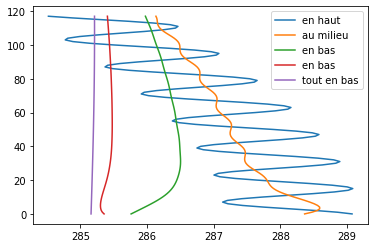

In [28]:
temp = np.asarray(temp)
plt.plot(temp[:,0][1:-1],range(nb_plot-2),label='en haut')
plt.plot(temp[:,30][1:-1],range(nb_plot-2),label='au milieu')
plt.plot(temp[:,60][1:-1],range(nb_plot-2),label='en bas')
plt.plot(temp[:,90][1:-1],range(nb_plot-2),label='en bas')
plt.plot(temp[:,99][1:-1],range(nb_plot-2),label='tout en bas')


plt.legend()
plt.show()

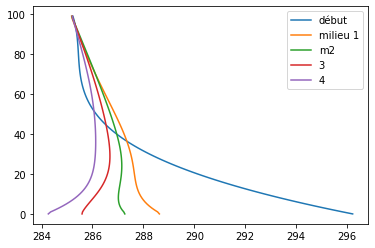

In [29]:
temp = np.asarray(temp)
plt.plot(temp[0],range(len(temp[0])),label='début')
plt.plot(temp[30],range(len(temp[0])),label='milieu 1')
plt.plot(temp[60],range(len(temp[0])),label='m2')
plt.plot(temp[90],range(len(temp[0])),label='3')
plt.plot(temp[119],range(len(temp[0])),label='4')
plt.legend()


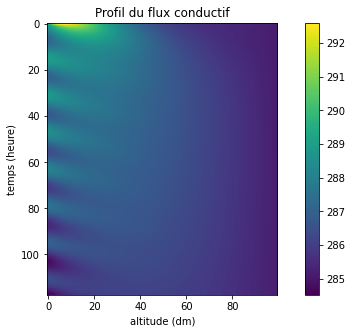

In [31]:
fig = plt.figure(figsize=(10,5))
plt.title('Profil du flux conductif')
plt.xlabel('altitude (dm)')
plt.ylabel('temps (heure)')
plt.imshow(temp[:][1:-1])
plt.colorbar()
plt.show()

In [8]:
# Simulation 2 : K = 1e-7 m/s

In [9]:
test = pd.read_csv('value to test.csv')
test.drop(columns=['Unnamed: 0'])
test_val = test.values.tolist()
test_val=np.asarray(test_val)
test_val=test_val[:,1:]

dH_test = [[datetime.datetime.today()+ datetime.timedelta(seconds=i*1.5*3600),[0.01,test_val[i][0]]] for i in range(len(test_val))][:120]

T_test = [[datetime.datetime.today()+ datetime.timedelta(seconds=i*1.5*3600),list(test_val[i,1:])] for i in range(len(test_val))][:120]

col_dict = {
    "river_bed": 1, ##hauteur de la rivière en m
    "offset" : 0.05,#décalage
    "depth_sensors": np.array([.2, .4, .6, .8]), # Profondeur ou sont les capteurs
    "dH_measures": dH_test,#[datetime,[P,T]]
    "T_measures": T_test, # shape (N,4,2) Chaque 4-uplets de mesure de temperature au temps t
    "sigma_meas_P": .4, #incertitude sur la pression
    "sigma_meas_T" : 0.1
}


priors = {
    "moinslog10K": ((3, 10), 0.2), # (intervalle, sigma)
    "n": ((0.01,0.2),0.01),
    "lambda_s": ((1,5),0.1),
    "rhos_cs":((700*650,2800*1080),100000),
}
column = Column.from_dict(col_dict)

In [32]:
params ={'moinslog10K':7,'lambda_s': 1.08, 'n':0.15,'rhos_cs':4e6, 'nb_cel':100}
temp,delta_h = column.solve_transi(params)

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.title('Profil du flux conductif')
plt.xlabel('altitude (dm)')
plt.ylabel('temps (heure)')
plt.imshow(temp[:][1:-1])
plt.colorbar()
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import datetime
import pandas as pd
from calcul import Column

test = pd.read_csv('value to test.csv')
test.drop(columns=['Unnamed: 0'])
test_val = test.values.tolist()
test_val=np.asarray(test_val)
test_val=test_val[:,1:]

dH_test = [[datetime.datetime.today()+ datetime.timedelta(seconds=i*1.5*3600),[0.01,test_val[i][0]]] for i in range(len(test_val))][:120]

T_test = [[datetime.datetime.today()+ datetime.timedelta(seconds=i*1.5*3600),list(test_val[i,1:])] for i in range(len(test_val))][:120]

col_dict = {
    "river_bed": 1, ##hauteur de la rivière en m
    "offset" : 0.05,#décalage
    "depth_sensors": np.array([.2, .4, .6, .8]), # Profondeur ou sont les capteurs
    "dH_measures": dH_test,#[datetime,[P,T]]
    "T_measures": T_test, # shape (N,4,2) Chaque 4-uplets de mesure de temperature au temps t
    "sigma_meas_P": .4, #incertitude sur la pression
    "sigma_meas_T" : 0.1
}


priors = {
    "moinslog10K": ((3, 10), 0.2), # (intervalle, sigma)
    "n": ((0.01,0.2),0.01),
    "lambda_s": ((1,5),0.1),
    "rhos_cs":((700*650,2800*1080),100000),
}
column = Column.from_dict(col_dict)

ModuleNotFoundError: No module named 'calcul'

In [6]:
###Test de la MCMC
column.mcmc(priors,5000,100,0.75)

16/5000 [25:50<01:54,  3.36it/s]
100%|██████████| 5000/5000 [27:44<00:00,  3.37it/s]

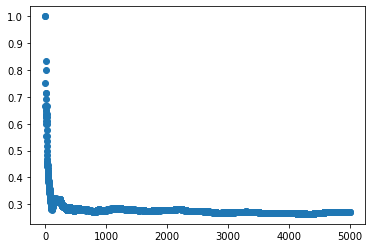

In [7]:
plt.scatter(range(len(column.moy_acceptation)),column.moy_acceptation)

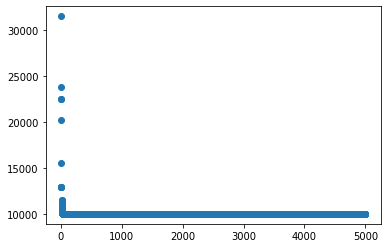

In [8]:
plt.scatter(range(len(column.energie)),column.energie)

In [17]:
#column.energie[:-30]

In [18]:
column.get_best_params()

(9.993517496834695, 4.984450521076184, 0.11664576513525991, 880609.607613171)

In [10]:
res = column.get_all_params()
k= res[:,0]
lbd = res[:,1]
n = res[:,2]
rhos_cs = res[:,3]

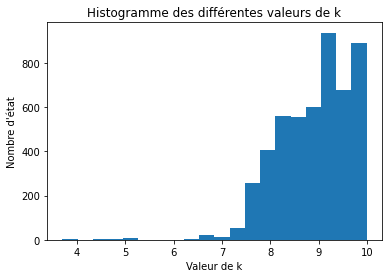

In [11]:
plt.hist(k,bins=20)
plt.xlabel("Valeur de k")
plt.ylabel("Nombre d'état")
plt.title("Histogramme des différentes valeurs de k")
plt.show()

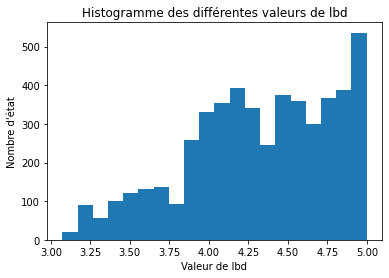

In [12]:
plt.hist(lbd,bins=20)
plt.xlabel("Valeur de lbd")
plt.ylabel("Nombre d'état")
plt.title("Histogramme des différentes valeurs de lbd")
plt.show()

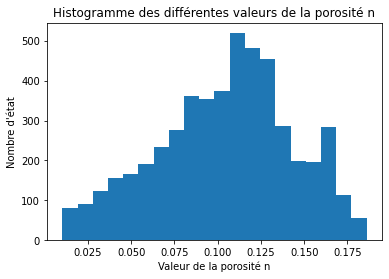

In [13]:
plt.hist(n,bins=20)
plt.xlabel("Valeur de la porosité n")
plt.ylabel("Nombre d'état")
plt.title("Histogramme des différentes valeurs de la porosité n")
plt.show()

In [14]:
res_deb = column.debit
res_deb[5]

4.797348544798324e-12